# Annexe

In [1]:
def descriptive_data(df, country=None):
    
    data = df.copy()
    if country:
        data = data[data.country == country]
        
    number_unique_ref = len(set(data.reference.values))
    number_unique_ref_collection = {}
    for collection in data.collection.unique():
        data_collection = data[data.collection == collection]
        number_unique_ref_collection[collection] = len(set(data_collection.reference.values))
        
        
    return number_unique_ref, number_unique_ref_collection

In [2]:
def analyze_country(data, country=None):
    """
    Analyze the country data.

    Parameters:
    data (pd.DataFrame): The data to analyze.
    country (str, optional): The country to filter by. Defaults to None.

    Returns:
    tuple: A tuple containing the overall statistics and the collection statistics.
    """
    # Filter the original data if a specific country is provided
    if country:
        data = data[data["country"] == country]
    
    # Identify the cheapest and most expensive product in the whole subset
    cheapest_product_data = data.nsmallest(1, 'price')
    most_expensive_product_data = data.nlargest(1, 'price')
    
    overall_stats = {
        "cheapest": {
            "collection": cheapest_product_data['collection'].values[0],
            "reference": cheapest_product_data['reference'].values[0],
            "price": cheapest_product_data['price'].values[0]
        },
        "most_expensive": {
            "collection": most_expensive_product_data['collection'].values[0],
            "reference": most_expensive_product_data['reference'].values[0],
            "price": most_expensive_product_data['price'].values[0]
        }
    }
    
    # Identify the cheapest and most expensive product per collection
    collection_stats = []
    unique_collections = data["collection"].unique()
    
    for collection in unique_collections:
        collection_data = data[data["collection"] == collection]
        
        cheapest_collection_data = collection_data.nsmallest(1, 'price')
        most_expensive_collection_data = collection_data.nlargest(1, 'price')
        
        collection_stats.append({
            "collection": collection,
            "cheapest": {
                "reference": cheapest_collection_data['reference'].values[0],
                "price": cheapest_collection_data['price'].values[0]
            },
            "most_expensive": {
                "reference": most_expensive_collection_data['reference'].values[0],
                "price": most_expensive_collection_data['price'].values[0]
            }
        })
    
    return overall_stats, collection_stats

In [3]:
def collection_visualization(data, country=None):
    """
    Visualize the collection data.

    Parameters:
    data (pd.DataFrame): The data to visualize.
    country (str): The country to filter by.

    Returns:
    None
    """
    # Filter the original data if a specific country is provided
    if country:
        data = data[data["country"] == country]
    
    # Choose a color palette
    palette = sns.color_palette("pastel")  # You can choose different palettes like "deep", "pastel", etc.

    # Create the count plot
    ax = sns.countplot(x="collection", data=data, palette=palette)

    # Add the count value on top of each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', 
                    (p.get_x() + p.get_width() / 2., p.get_y() + p.get_height() / 2.), 
                    ha='center', va='center', 
                    fontsize=10, color='black', 
                    xytext=(0, 5), textcoords='offset points')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

    # Labels and title
    plt.xlabel("Collection")
    plt.ylabel("Watch Count")
    plt.title(f"Watch Count per Collection")
    if country:
        data = data[data["country"] == country]
        plt.title(f"Watch Count per Collection in {country}")

    # Show the plot
    plt.show()

In [4]:
def plot_collection_by_country(data):
    """
    Plot the number of items in each collection for each country on the same graph.
    
    Parameters:
        data (pd.DataFrame): Data containing at least 'collection' and 'country' columns.
    
    Returns:
        None
    """
    # Set the figure size
    plt.figure(figsize=(10, 6))
    
    # Create a count plot with 'collection' on the x-axis and bars grouped by 'country'
    ax = sns.countplot(x="collection", hue="country", data=data, palette="pastel")
    
    # Annotate each bar with its count
    for p in ax.patches:
        count = p.get_height()
        ax.annotate(f'{int(count)}',
                    (p.get_x() + p.get_width() / 2, p.get_y() + count / 2),
                    ha='center', va='center',
                    fontsize=10, color='black', 
                    xytext=(0, 5), textcoords='offset points')
    
    # Improve readability
    plt.xticks(rotation=45)
    plt.xlabel("Collection")
    plt.ylabel("Watch Count")
    plt.title("Watch Count per Collection by Country")
    plt.legend(title="Country")
    plt.tight_layout()
    plt.show()

# 1. Import librariries

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Load & Read the Data

In [6]:
data = pd.read_excel(r"../orchestrator/data/bronze/PANERAI_DATA_122021.xlsx")
data.head()

,brand,url,image_url,collection,reference,price,currency,country,time scope
0,Panerai,https://www.panerai.com/fr/fr/collections/watc...,https://www.panerai.com/content/dam/rcq/pan/10...,RADIOMIR,PAM00655,9700.0,EUR,France,December 2021
1,Panerai,https://www.panerai.com/fr/fr/collections/watc...,https://www.panerai.com/content/dam/rcq/pan/11...,RADIOMIR,PAM00628,11600.0,EUR,France,December 2021
2,Panerai,https://www.panerai.com/fr/fr/collections/watc...,https://www.panerai.com/content/dam/rcq/pan/11...,RADIOMIR,PAM00657,11400.0,EUR,France,December 2021
3,Panerai,https://www.panerai.com/fr/fr/collections/watc...,https://www.panerai.com/content/dam/rcq/pan/13...,LUMINOR,PAM00661,11900.0,EUR,France,December 2021
4,Panerai,https://www.panerai.com/fr/fr/collections/watc...,https://www.panerai.com/content/dam/rcq/pan/13...,LUMINOR,PAM01312,7900.0,EUR,France,December 2021


In [7]:
data["year"] = data["time scope"].str[-4:].astype(int)
data.drop("time scope", axis=1, inplace=True)
data.head()

,brand,url,image_url,collection,reference,price,currency,country,year
0,Panerai,https://www.panerai.com/fr/fr/collections/watc...,https://www.panerai.com/content/dam/rcq/pan/10...,RADIOMIR,PAM00655,9700.0,EUR,France,2021
1,Panerai,https://www.panerai.com/fr/fr/collections/watc...,https://www.panerai.com/content/dam/rcq/pan/11...,RADIOMIR,PAM00628,11600.0,EUR,France,2021
2,Panerai,https://www.panerai.com/fr/fr/collections/watc...,https://www.panerai.com/content/dam/rcq/pan/11...,RADIOMIR,PAM00657,11400.0,EUR,France,2021
3,Panerai,https://www.panerai.com/fr/fr/collections/watc...,https://www.panerai.com/content/dam/rcq/pan/13...,LUMINOR,PAM00661,11900.0,EUR,France,2021
4,Panerai,https://www.panerai.com/fr/fr/collections/watc...,https://www.panerai.com/content/dam/rcq/pan/13...,LUMINOR,PAM01312,7900.0,EUR,France,2021


# 3. Exploratory Data Analysis (EDA)

### 3.1. Columns list

In [8]:
column_list = list(data.columns)

print("List of column name:\n")
for i in range(len(column_list)):
    print(f"\t{i+1}. {column_list[i]}")

List of column name:

	1. brand
	2. url
	3. image_url
	4. collection
	5. reference
	6. price
	7. currency
	8. country
	9. year


### 3.2. Data types discovery

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693 entries, 0 to 692
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   brand       693 non-null    object 
 1   url         693 non-null    object 
 2   image_url   690 non-null    object 
 3   collection  693 non-null    object 
 4   reference   693 non-null    object 
 5   price       687 non-null    float64
 6   currency    693 non-null    object 
 7   country     693 non-null    object 
 8   year        693 non-null    int32  
dtypes: float64(1), int32(1), object(7)
memory usage: 46.1+ KB


--------------------------------------------------------------------------------------

**The dataset we used in the following use case contains**:

    1. 693 row of data
    
    2. 8 categoircal columns
    
    3. 1 numerical column
--------------------------------------------------------------------------------------

### 3.3. Check Missing Values

In [10]:
data.isna().sum()

brand         0
url           0
image_url     3
collection    0
reference     0
price         6
currency      0
country       0
year          0
dtype: int64

--------------------------------------------------------------------------------------

**The dataset contains some missing values**:

    - 3 in **image_url** column
    
    - 6 in **price** column
--------------------------------------------------------------------------------------

#### 3.3. Handling missing values

In [11]:
data.dropna(subset=['reference', 'price'], inplace=True)
data.isna().sum()

brand         0
url           0
image_url     3
collection    0
reference     0
price         0
currency      0
country       0
year          0
dtype: int64

--------------------------------------------------------------------------------------

**Now, the dataset is clean, no more missing values**

    ** -> We are ready to GO **

--------------------------------------------------------------------------------------

### 3.4. Check for duplicates bases on 'reference' and 'country'

In [12]:
# Check for duplicates based on 'reference', 'country', and 'collection'
duplicates = data.duplicated(subset=['reference', 'country']).sum()

# Display the duplicate rows
print(duplicates)

0


### 3.5. Descriptive statistics

In [13]:
stats = data.describe(include="object")
stats

,brand,url,image_url,collection,reference,currency,country
count,687,687,684,687,687,687,687
unique,1,687,206,4,207,4,4
top,Panerai,https://www.panerai.com/fr/fr/collections/watc...,https://www.panerai.com/content/dam/rcq/pan/10...,LUMINOR,PAM00655,JPY,Japan
freq,687,1,4,368,4,201,201


# 4. Data and Business Analysis

### 4.1. Global dataset
- Number of unique products
- Number of products for each collection
- Products distribution

In [14]:
number_unique_ref, number_unique_ref_collection = descriptive_data(data)
    
print(f"\nThe number of unique references {number_unique_ref}")
print(f"\nThe number of unique references par collection")
for collection, number in number_unique_ref_collection.items():
    print(f"{collection} : {number}")


The number of unique references 207

The number of unique references par collection
RADIOMIR : 31
LUMINOR : 111
SUBMERSIBLE : 32
LUMINOR-DUE : 33


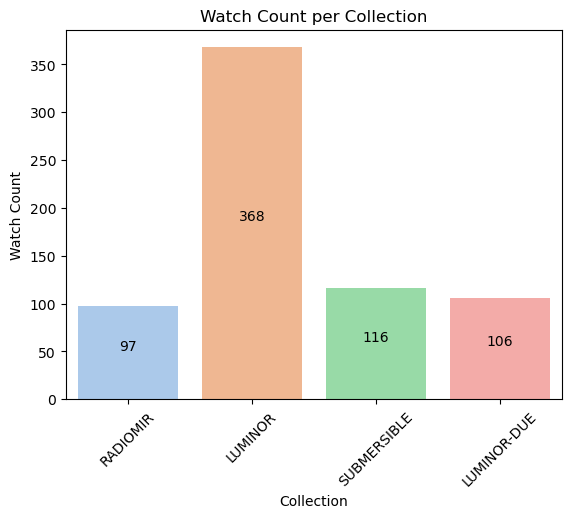

In [15]:
collection_visualization(data)

### 4.2. For each country
- Number of unique products
- Number of products for each collection
- The distribution of products
- For each collection using country currency
    - Cheapest and most expensive product
    - Cheapest and most expensive product per collection

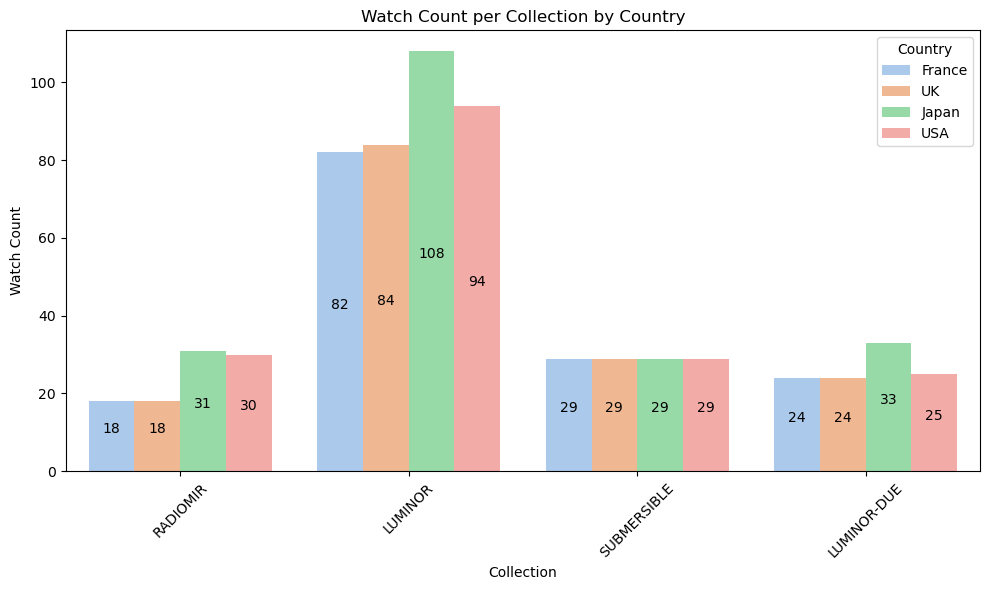

In [16]:
plot_collection_by_country(data)

### France

In [17]:
country = "France"

number_unique_ref, number_unique_ref_collection = descriptive_data(data, country = country)
overall_stats, collection_stats = analyze_country(data, country = country)

print(f"\n ** The number of unique references {number_unique_ref}")
print(f"\n ** The number of unique references par collection:\n")
for collection, number in number_unique_ref_collection.items():
    print(f"  - {collection} : {number}")
print("\n"+"-"*80+"") 
# Identify the cheapest and most expensive product in the whole subset
print(f"\n ** Cheapest and most expensive product in {country}:\n")
print(f"  Cheapest -> Collection: {overall_stats['cheapest']['collection']}, Reference: {overall_stats['cheapest']['reference']}, Price: {overall_stats['cheapest']['price']} {(data['currency'][data['country'] == country]).unique()[0]}")
print(f"  Most Expensive -> Collection: {overall_stats['most_expensive']['collection']}, Reference: {overall_stats['most_expensive']['reference']}, Price: {overall_stats['most_expensive']['price']} {(data['currency'][data['country'] == country]).unique()[0]}")
print("\n"+"-"*80+"")
# Identify the cheapest and most expensive product per collection
print(f"\n ** Cheapest and most expensive product in {country} per collection:\n")
for stat in collection_stats:
    print(f" - Collection: {stat['collection']}")
    print(f"    Cheapest -> Reference: {stat['cheapest']['reference']}, Price: {stat['cheapest']['price']} {(data['currency'][data['country'] == country]).unique()[0]}")
    print(f"    Most Expensive -> Reference: {stat['most_expensive']['reference']}, Price: {stat['most_expensive']['price']} {(data['currency'][data['country'] == country]).unique()[0]}")
    print("\n"+"*"*50+"\n")


 ** The number of unique references 153

 ** The number of unique references par collection:

  - RADIOMIR : 18
  - LUMINOR : 82
  - SUBMERSIBLE : 29
  - LUMINOR-DUE : 24

--------------------------------------------------------------------------------

 ** Cheapest and most expensive product in France:

  Cheapest -> Collection: RADIOMIR, Reference: PAM00753, Price: 4400.0 EUR
  Most Expensive -> Collection: SUBMERSIBLE, Reference: PAM01108, Price: 190000.0 EUR

--------------------------------------------------------------------------------

 ** Cheapest and most expensive product in France per collection:

 - Collection: RADIOMIR
    Cheapest -> Reference: PAM00753, Price: 4400.0 EUR
    Most Expensive -> Reference: PAM00997, Price: 12900.0 EUR

**************************************************

 - Collection: LUMINOR
    Cheapest -> Reference: PAM00774, Price: 4900.0 EUR
    Most Expensive -> Reference: PAM01060, Price: 166000.0 EUR

**********************************************

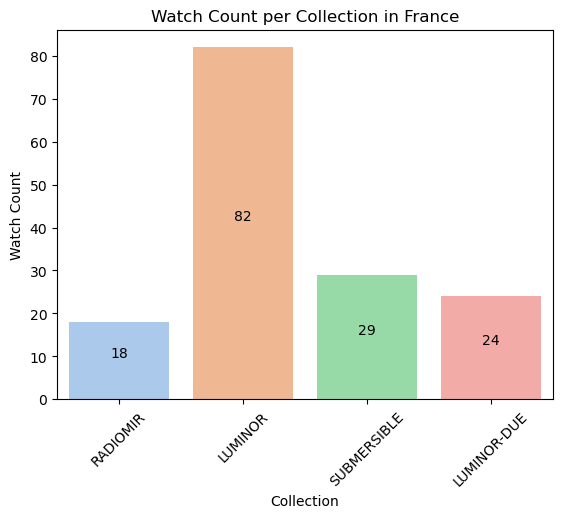

In [18]:
collection_visualization(data, country)

### UK

In [19]:
country = "UK"

number_unique_ref, number_unique_ref_collection = descriptive_data(data, country = country)
overall_stats, collection_stats = analyze_country(data, country = country)

print(f"\n ** The number of unique references {number_unique_ref}")
print(f"\n ** The number of unique references par collection:\n")
for collection, number in number_unique_ref_collection.items():
    print(f"  - {collection} : {number}")
print("\n"+"-"*80+"") 
# Identify the cheapest and most expensive product in the whole subset
print(f"\n ** Cheapest and most expensive product in {country}:\n")
print(f"  Cheapest -> Collection: {overall_stats['cheapest']['collection']}, Reference: {overall_stats['cheapest']['reference']}, Price: {overall_stats['cheapest']['price']} {(data['currency'][data['country'] == country]).unique()[0]}")
print(f"  Most Expensive -> Collection: {overall_stats['most_expensive']['collection']}, Reference: {overall_stats['most_expensive']['reference']}, Price: {overall_stats['most_expensive']['price']} {(data['currency'][data['country'] == country]).unique()[0]}")
print("\n"+"-"*80+"")
# Identify the cheapest and most expensive product per collection
print(f"\n ** Cheapest and most expensive product in {country} per collection:\n")
for stat in collection_stats:
    print(f" - Collection: {stat['collection']}")
    print(f"    Cheapest -> Reference: {stat['cheapest']['reference']}, Price: {stat['cheapest']['price']} {(data['currency'][data['country'] == country]).unique()[0]}")
    print(f"    Most Expensive -> Reference: {stat['most_expensive']['reference']}, Price: {stat['most_expensive']['price']} {(data['currency'][data['country'] == country]).unique()[0]}")
    print("\n"+"*"*50+"\n")


 ** The number of unique references 155

 ** The number of unique references par collection:

  - RADIOMIR : 18
  - LUMINOR : 84
  - LUMINOR-DUE : 24
  - SUBMERSIBLE : 29

--------------------------------------------------------------------------------

 ** Cheapest and most expensive product in UK:

  Cheapest -> Collection: RADIOMIR, Reference: PAM00753, Price: 3800.0 GBP
  Most Expensive -> Collection: SUBMERSIBLE, Reference: PAM01108, Price: 169900.0 GBP

--------------------------------------------------------------------------------

 ** Cheapest and most expensive product in UK per collection:

 - Collection: RADIOMIR
    Cheapest -> Reference: PAM00753, Price: 3800.0 GBP
    Most Expensive -> Reference: PAM00997, Price: 11500.0 GBP

**************************************************

 - Collection: LUMINOR
    Cheapest -> Reference: PAM00774, Price: 4300.0 GBP
    Most Expensive -> Reference: PAM01060, Price: 148200.0 GBP

**************************************************

 -

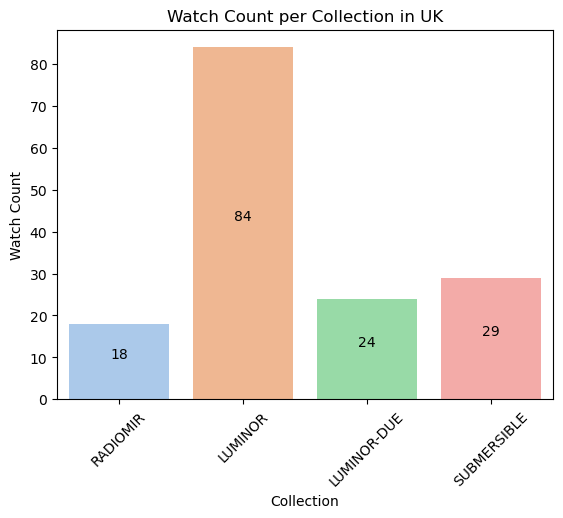

In [20]:
collection_visualization(data, country)

### USA

In [21]:
country = "USA"

number_unique_ref, number_unique_ref_collection = descriptive_data(data, country = country)
overall_stats, collection_stats = analyze_country(data, country = country)

print(f"\n ** The number of unique references {number_unique_ref}")
print(f"\n ** The number of unique references par collection:\n")
for collection, number in number_unique_ref_collection.items():
    print(f"  - {collection} : {number}")
print("\n"+"-"*80+"") 
# Identify the cheapest and most expensive product in the whole subset
print(f"\n ** Cheapest and most expensive product in {country}:\n")
print(f"  Cheapest -> Collection: {overall_stats['cheapest']['collection']}, Reference: {overall_stats['cheapest']['reference']}, Price: {overall_stats['cheapest']['price']} {(data['currency'][data['country'] == country]).unique()[0]}")
print(f"  Most Expensive -> Collection: {overall_stats['most_expensive']['collection']}, Reference: {overall_stats['most_expensive']['reference']}, Price: {overall_stats['most_expensive']['price']} {(data['currency'][data['country'] == country]).unique()[0]}")
print("\n"+"-"*80+"")
# Identify the cheapest and most expensive product per collection
print(f"\n ** Cheapest and most expensive product in {country} per collection:\n")
for stat in collection_stats:
    print(f" - Collection: {stat['collection']}")
    print(f"    Cheapest -> Reference: {stat['cheapest']['reference']}, Price: {stat['cheapest']['price']} {(data['currency'][data['country'] == country]).unique()[0]}")
    print(f"    Most Expensive -> Reference: {stat['most_expensive']['reference']}, Price: {stat['most_expensive']['price']} {(data['currency'][data['country'] == country]).unique()[0]}")
    print("\n"+"*"*50+"\n")


 ** The number of unique references 178

 ** The number of unique references par collection:

  - RADIOMIR : 30
  - LUMINOR : 94
  - LUMINOR-DUE : 25
  - SUBMERSIBLE : 29

--------------------------------------------------------------------------------

 ** Cheapest and most expensive product in USA:

  Cheapest -> Collection: RADIOMIR, Reference: PAM00753, Price: 5700.0 USD
  Most Expensive -> Collection: SUBMERSIBLE, Reference: PAM01108, Price: 247700.0 USD

--------------------------------------------------------------------------------

 ** Cheapest and most expensive product in USA per collection:

 - Collection: RADIOMIR
    Cheapest -> Reference: PAM00753, Price: 5700.0 USD
    Most Expensive -> Reference: PAM00515, Price: 27200.0 USD

**************************************************

 - Collection: LUMINOR
    Cheapest -> Reference: PAM00773, Price: 6400.0 USD
    Most Expensive -> Reference: PAM01060, Price: 217000.0 USD

**************************************************



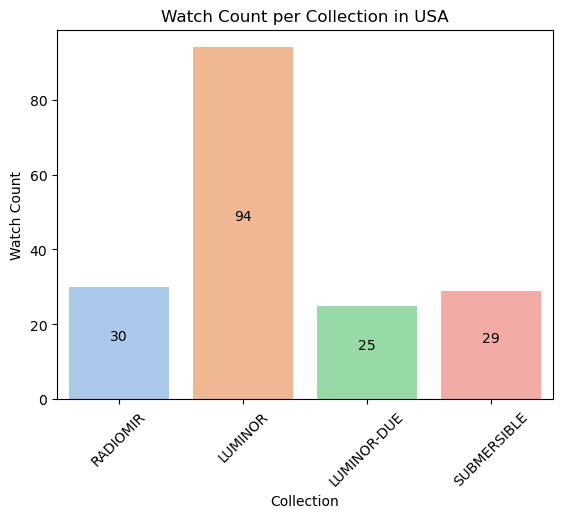

In [22]:
collection_visualization(data, country)

### Japan

In [23]:
country = "Japan"

number_unique_ref, number_unique_ref_collection = descriptive_data(data, country = country)
overall_stats, collection_stats = analyze_country(data, country = country)

print(f"\n ** The number of unique references {number_unique_ref}")
print(f"\n ** The number of unique references par collection:\n")
for collection, number in number_unique_ref_collection.items():
    print(f"  - {collection} : {number}")
print("\n"+"-"*80+"") 
# Identify the cheapest and most expensive product in the whole subset
print(f"\n ** Cheapest and most expensive product in {country}:\n")
print(f"  Cheapest -> Collection: {overall_stats['cheapest']['collection']}, Reference: {overall_stats['cheapest']['reference']}, Price: {overall_stats['cheapest']['price']} {(data['currency'][data['country'] == country]).unique()[0]}")
print(f"  Most Expensive -> Collection: {overall_stats['most_expensive']['collection']}, Reference: {overall_stats['most_expensive']['reference']}, Price: {overall_stats['most_expensive']['price']} {(data['currency'][data['country'] == country]).unique()[0]}")
print("\n"+"-"*80+"")
# Identify the cheapest and most expensive product per collection
print(f"\n ** Cheapest and most expensive product in {country} per collection:\n")
for stat in collection_stats:
    print(f" - Collection: {stat['collection']}")
    print(f"    Cheapest -> Reference: {stat['cheapest']['reference']}, Price: {stat['cheapest']['price']} {(data['currency'][data['country'] == country]).unique()[0]}")
    print(f"    Most Expensive -> Reference: {stat['most_expensive']['reference']}, Price: {stat['most_expensive']['price']} {(data['currency'][data['country'] == country]).unique()[0]}")
    print("\n"+"*"*50+"\n")


 ** The number of unique references 201

 ** The number of unique references par collection:

  - RADIOMIR : 31
  - LUMINOR : 108
  - LUMINOR-DUE : 33
  - SUBMERSIBLE : 29

--------------------------------------------------------------------------------

 ** Cheapest and most expensive product in Japan:

  Cheapest -> Collection: RADIOMIR, Reference: PAM00753, Price: 550000.0 JPY
  Most Expensive -> Collection: LUMINOR, Reference: PAM01060, Price: 20712000.0 JPY

--------------------------------------------------------------------------------

 ** Cheapest and most expensive product in Japan per collection:

 - Collection: RADIOMIR
    Cheapest -> Reference: PAM00753, Price: 550000.0 JPY
    Most Expensive -> Reference: PAM00515, Price: 2618000.0 JPY

**************************************************

 - Collection: LUMINOR
    Cheapest -> Reference: PAM00773, Price: 616000.0 JPY
    Most Expensive -> Reference: PAM01060, Price: 20712000.0 JPY

***************************************

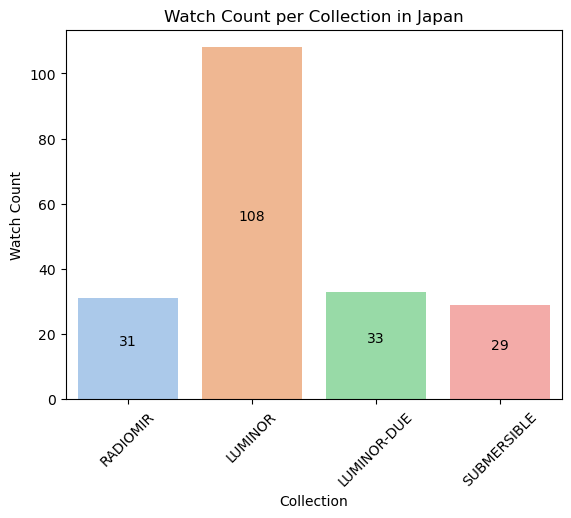

In [24]:
collection_visualization(data, country)

### 4.3. Select product that are available in 4 countries (under unified price currency “USD”)
1. For each product (reference) compare the price of the product with the median price of the product on the 4 country
   - **Price Difference** = Watch Price (in USD) – Median Watch Price across the Four Markets (in USD)
   - **Difference Rate (%)** = (Price Difference / Median Watch Price across the Four Markets (in USD)) × 10

2. Product with the lowest / highest Difference rate
3. Countries that encourage gray market activity and the number of opportunities created, and the margin lost to the gray market for each collection compared to the median price

In [25]:
exchange_rates = {
    'USD': 1.00,   # 1 USD ≈ 1.00 USD in 2021
    'GBP': 1.38,   # 1 GBP ≈ 1.38 USD in 2021
    'JPY': 0.0091, # 1 JPY ≈ 0.0091 USD in 2021
    'EUR': 1.18    # 1 EUR ≈ 1.18 USD in 2021
}

data['price_USD'] = data['price'] * data['currency'].map(exchange_rates)

In [26]:
data.to_csv(r"../orchestrator/data/silver/PANERAI_DATA_2021.csv", index=False)

In [27]:
data_subset = data[["collection", "reference", "price", "currency", "country", "year", "price_USD"]]
commun_data = data_subset.groupby('reference').filter(
    lambda group: set(data_subset.country.unique()).issubset(set(group['country']))
)

In [28]:
commun_data.head()

,collection,reference,price,currency,country,year,price_USD
0,RADIOMIR,PAM00655,9700.0,EUR,France,2021,11446.0
1,RADIOMIR,PAM00628,11600.0,EUR,France,2021,13688.0
2,RADIOMIR,PAM00657,11400.0,EUR,France,2021,13452.0
3,LUMINOR,PAM00661,11900.0,EUR,France,2021,14042.0
4,LUMINOR,PAM01312,7900.0,EUR,France,2021,9322.0


In [29]:
number_unique_ref, number_unique_ref_collection = descriptive_data(commun_data)
    
print(f"\nThe number of unique references {number_unique_ref}")
print(f"\nThe number of unique references par collection")
for collection, number in number_unique_ref_collection.items():
    print(f"{collection} : {number}")


The number of unique references 142

The number of unique references par collection
RADIOMIR : 18
LUMINOR : 77
SUBMERSIBLE : 26
LUMINOR-DUE : 21


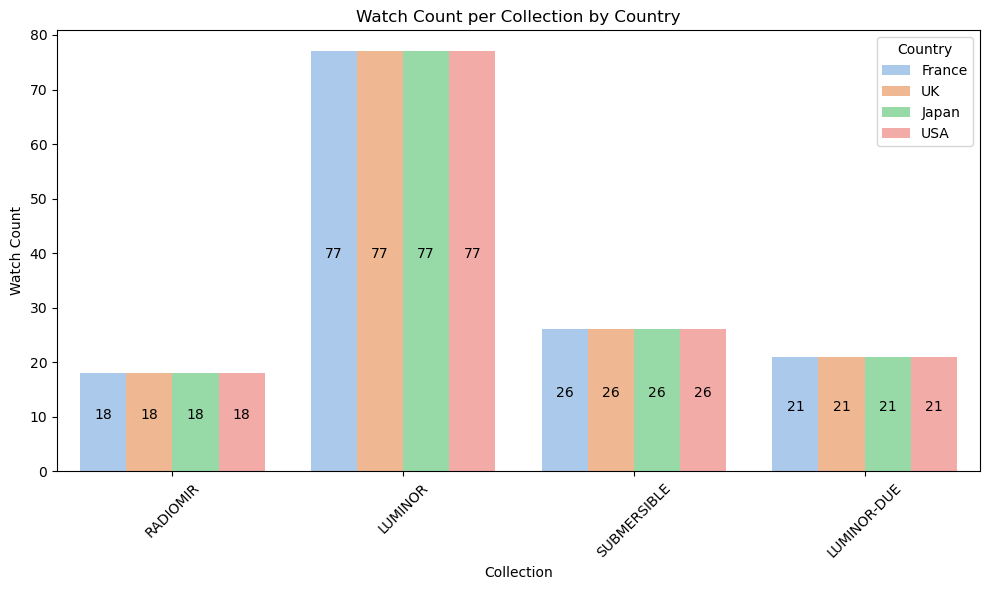

In [30]:
plot_collection_by_country(commun_data)

In [31]:
# Compute the median price_USD for each reference
median_by_reference = commun_data.groupby("reference")["price_USD"].median()

In [32]:
# Map the median price back to each row as a new column (optional)
commun_data["price_USD_median"] = commun_data["reference"].map(median_by_reference)

# Calculate the absolute difference between price_USD and the median
commun_data["Price Difference"] = commun_data["price_USD"] - commun_data["price_USD_median"]

# Calculate the rate (percentage difference) relative to the median
commun_data["Difference Rate (%)"] = (commun_data["Price Difference"] / commun_data["price_USD_median"]) * 100

# commun_data.drop("price_USD_median", axis=1, inplace=True)
commun_data.sort_values(["reference", "country"], inplace=True)
commun_data.reset_index(drop=True, inplace=True)

commun_data.head()

,collection,reference,price,currency,country,year,price_USD,price_USD_median,Price Difference,Difference Rate (%)
0,LUMINOR,PAM00233,12000.0,EUR,France,2021,14160.0,14463.0,-303.0,-2.095001
1,LUMINOR,PAM00233,1507000.0,JPY,Japan,2021,13713.7,14463.0,-749.3,-5.180806
2,LUMINOR,PAM00233,10700.0,GBP,UK,2021,14766.0,14463.0,303.0,2.095001
3,LUMINOR,PAM00233,15600.0,USD,USA,2021,15600.0,14463.0,1137.0,7.861440
4,LUMINOR,PAM00422,9800.0,EUR,France,2021,11564.0,11647.0,-83.0,-0.712630


In [33]:
commun_data.to_csv(r"../orchestrator/data/gold/Products_available_4countries_with_comparative_metrics_2021.csv", index=False)

#### 4.3.1. Identify Products with Extreme Difference Rates
#### Positive direction
##### 1. Product with positive Difference rate

In [34]:
positive_Difference_Rate = commun_data[commun_data["Difference Rate (%)"] >= 0].reset_index(drop=True)
positive_Difference_Rate

,collection,reference,price,currency,country,year,price_USD,price_USD_median,Price Difference,Difference Rate (%)
0,LUMINOR,PAM00233,10700.0,GBP,UK,2021,14766.0,14463.0,303.0,2.095001
1,LUMINOR,PAM00233,15600.0,USD,USA,2021,15600.0,14463.0,1137.0,7.861440
2,LUMINOR,PAM00422,8500.0,GBP,UK,2021,11730.0,11647.0,83.0,0.712630
3,LUMINOR,PAM00422,12800.0,USD,USA,2021,12800.0,11647.0,1153.0,9.899545
4,LUMINOR,PAM00423,8650.0,GBP,UK,2021,11937.0,11809.5,127.5,1.079639
...,...,...,...,...,...,...,...,...,...,...
279,LUMINOR,PAM01664,17600.0,USD,USA,2021,17600.0,16314.0,1286.0,7.882800
280,RADIOMIR,PAM02020,5800.0,GBP,UK,2021,8004.0,7837.0,167.0,2.130917
281,RADIOMIR,PAM02020,8400.0,USD,USA,2021,8400.0,7837.0,563.0,7.183871
282,LUMINOR,PAM02392,6700.0,GBP,UK,2021,9246.0,9166.0,80.0,0.872791


##### 2. Product with the highest Difference rate

In [35]:
highest_Difference_Rate = commun_data.nlargest(1, 'Difference Rate (%)').reset_index(drop=True)

print("\nProduct with the Highest Difference Rate:")
highest_Difference_Rate


Product with the Highest Difference Rate:


,collection,reference,price,currency,country,year,price_USD,price_USD_median,Price Difference,Difference Rate (%)
0,LUMINOR,PAM01438,18900.0,USD,USA,2021,18900.0,16697.0,2203.0,13.193987


In [36]:
highest_Difference_Rate.to_csv(r"../orchestrator/data/gold/Product_with_Highest_Difference_Rate_2021.csv", index=False)

#### Negative direction
##### 1. Product with negative Difference rate

In [37]:
negative_Difference_Rate = commun_data[commun_data["Difference Rate (%)"] < 0].reset_index(drop=True)
negative_Difference_Rate

,collection,reference,price,currency,country,year,price_USD,price_USD_median,Price Difference,Difference Rate (%)
0,LUMINOR,PAM00233,12000.0,EUR,France,2021,14160.0,14463.0,-303.0,-2.095001
1,LUMINOR,PAM00233,1507000.0,JPY,Japan,2021,13713.7,14463.0,-749.3,-5.180806
2,LUMINOR,PAM00422,9800.0,EUR,France,2021,11564.0,11647.0,-83.0,-0.712630
3,LUMINOR,PAM00422,1221000.0,JPY,Japan,2021,11111.1,11647.0,-535.9,-4.601185
4,LUMINOR,PAM00423,9900.0,EUR,France,2021,11682.0,11809.5,-127.5,-1.079639
...,...,...,...,...,...,...,...,...,...,...
279,LUMINOR,PAM01664,1683000.0,JPY,Japan,2021,15315.3,16314.0,-998.7,-6.121736
280,RADIOMIR,PAM02020,6500.0,EUR,France,2021,7670.0,7837.0,-167.0,-2.130917
281,RADIOMIR,PAM02020,792000.0,JPY,Japan,2021,7207.2,7837.0,-629.8,-8.036238
282,LUMINOR,PAM02392,7700.0,EUR,France,2021,9086.0,9166.0,-80.0,-0.872791


##### 2. Product with the lowest Difference rate

In [38]:
lowest_Difference_Rate = commun_data.nsmallest(1, 'Difference Rate (%)').reset_index(drop=True)

print("\nProduct with the Lowest Difference Rate:")
lowest_Difference_Rate


Product with the Lowest Difference Rate:


,collection,reference,price,currency,country,year,price_USD,price_USD_median,Price Difference,Difference Rate (%)
0,LUMINOR,PAM01441,10200.0,GBP,UK,2021,14076.0,15622.65,-1546.65,-9.900049


In [39]:
lowest_Difference_Rate.to_csv(r"../orchestrator/data/gold/Product_with_Lowest_Difference_Rate_2021.csv", index=False)

### 4.4. Gray market activity

In [40]:
country_negative_Difference_Rate = negative_Difference_Rate["country"].value_counts()

print("Countries that encourage gray market activity and the number of opportunities created")
for country, value in zip(country_negative_Difference_Rate.index, country_negative_Difference_Rate.values):
    print(f"{country} : {value}")

Countries that encourage gray market activity and the number of opportunities created
Japan : 142
France : 138
UK : 4


In [41]:
gray_market_margin_collection = negative_Difference_Rate.groupby(["country", "collection"])["Price Difference"].sum()*(-1)
print("The margin lost to the gray market for each collection, relative to the median price")
gray_market_margin_collection

The margin lost to the gray market for each collection, relative to the median price


country  collection 
France   LUMINOR        30273.5
         LUMINOR-DUE     4532.0
         RADIOMIR        4123.5
         SUBMERSIBLE    14731.5
Japan    LUMINOR        91875.9
         LUMINOR-DUE    15306.5
         RADIOMIR       12129.7
         SUBMERSIBLE    41901.8
UK       LUMINOR         2694.3
Name: Price Difference, dtype: float64

In [42]:
gray_market_margin_collection.to_csv(r"../orchestrator/data/gold/Margin_lost_to_the_gray_market_2021.csv", index=False)